In [5]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, roc_curve, roc_auc_score, precision_recall_curve,classification_report, confusion_matrix)
import seaborn as sns
import numpy as np

In [6]:
X, y = load_breast_cancer(return_X_y=True)
feature_names=load_breast_cancer().feature_names

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.20, random_state=23)

In [9]:
#train model
clf=LogisticRegression(max_iter=10000, random_state=0)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [10]:
#predictions
y_pred = clf.predict(X_test)
y_prob=clf.predict_proba(X_test)[:,1] #P for class 1

In [11]:
#accuracy
acc = accuracy_score(y_test,y_pred)*100
print("Accuracy : ",acc)

Accuracy :  96.49122807017544


Classification Report :                precision    recall  f1-score   support

           0       0.97      0.92      0.95        39
           1       0.96      0.99      0.97        75

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



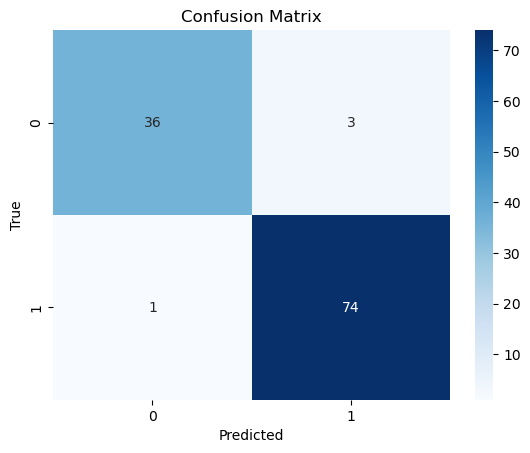

In [15]:
#classification report
print("Classification Report : ",classification_report(y_test,y_pred))

#confusion matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

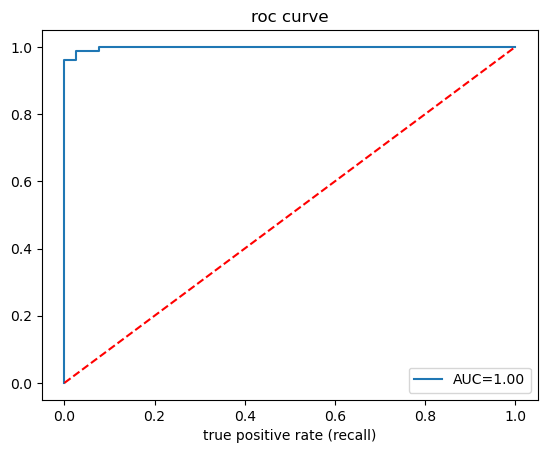

In [17]:
#roc curve
fpr, tpr, _= roc_curve(y_test, y_prob)
roc_auc=roc_auc_score(y_test, y_prob)

plt.plot(fpr,tpr,label=f"AUC={roc_auc:.2f}")
plt.plot([0,1],[0,1],'r--')
plt.title("roc curve")
plt.xlabel("false positive rate")
plt.xlabel("true positive rate (recall)")
plt.legend()
plt.show()

In [ ]:
#precision recall curve